# **IBM HR Analytics Employee Attrition &  Performance**

In [23]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/nlc/INNOVATIVE DAV ML/HR-Employee-Attrition.csv')

df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
if df['Over18'].nunique() == 1:
   df.drop('Over18', axis=1, inplace=True)
   print("'Over18' column dropped as all values are the same.")
else:
   print("'Over18' column contains different values.")

'Over18' column dropped as all values are the same.


**OUTLIER DETECTION**

In [9]:
def detect_outliers_iqr(df):
   outlier_counts = {}
   for col in df.select_dtypes(include=[np.number]):
       Q1 = df[col].quantile(0.25)
       Q3 = df[col].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
       outlier_counts[col] = len(outliers)
   return outlier_counts
outliers_iqr = detect_outliers_iqr(df)

print("\nTotal Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
   print(f"{col}: {count} outliers")



Total Outliers detected using IQR method:
Age: 0 outliers
DailyRate: 0 outliers
DistanceFromHome: 0 outliers
Education: 0 outliers
EmployeeCount: 0 outliers
EmployeeNumber: 0 outliers
EnvironmentSatisfaction: 0 outliers
HourlyRate: 0 outliers
JobInvolvement: 0 outliers
JobLevel: 0 outliers
JobSatisfaction: 0 outliers
MonthlyIncome: 114 outliers
MonthlyRate: 0 outliers
NumCompaniesWorked: 52 outliers
PercentSalaryHike: 0 outliers
PerformanceRating: 226 outliers
RelationshipSatisfaction: 0 outliers
StandardHours: 0 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
WorkLifeBalance: 0 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers


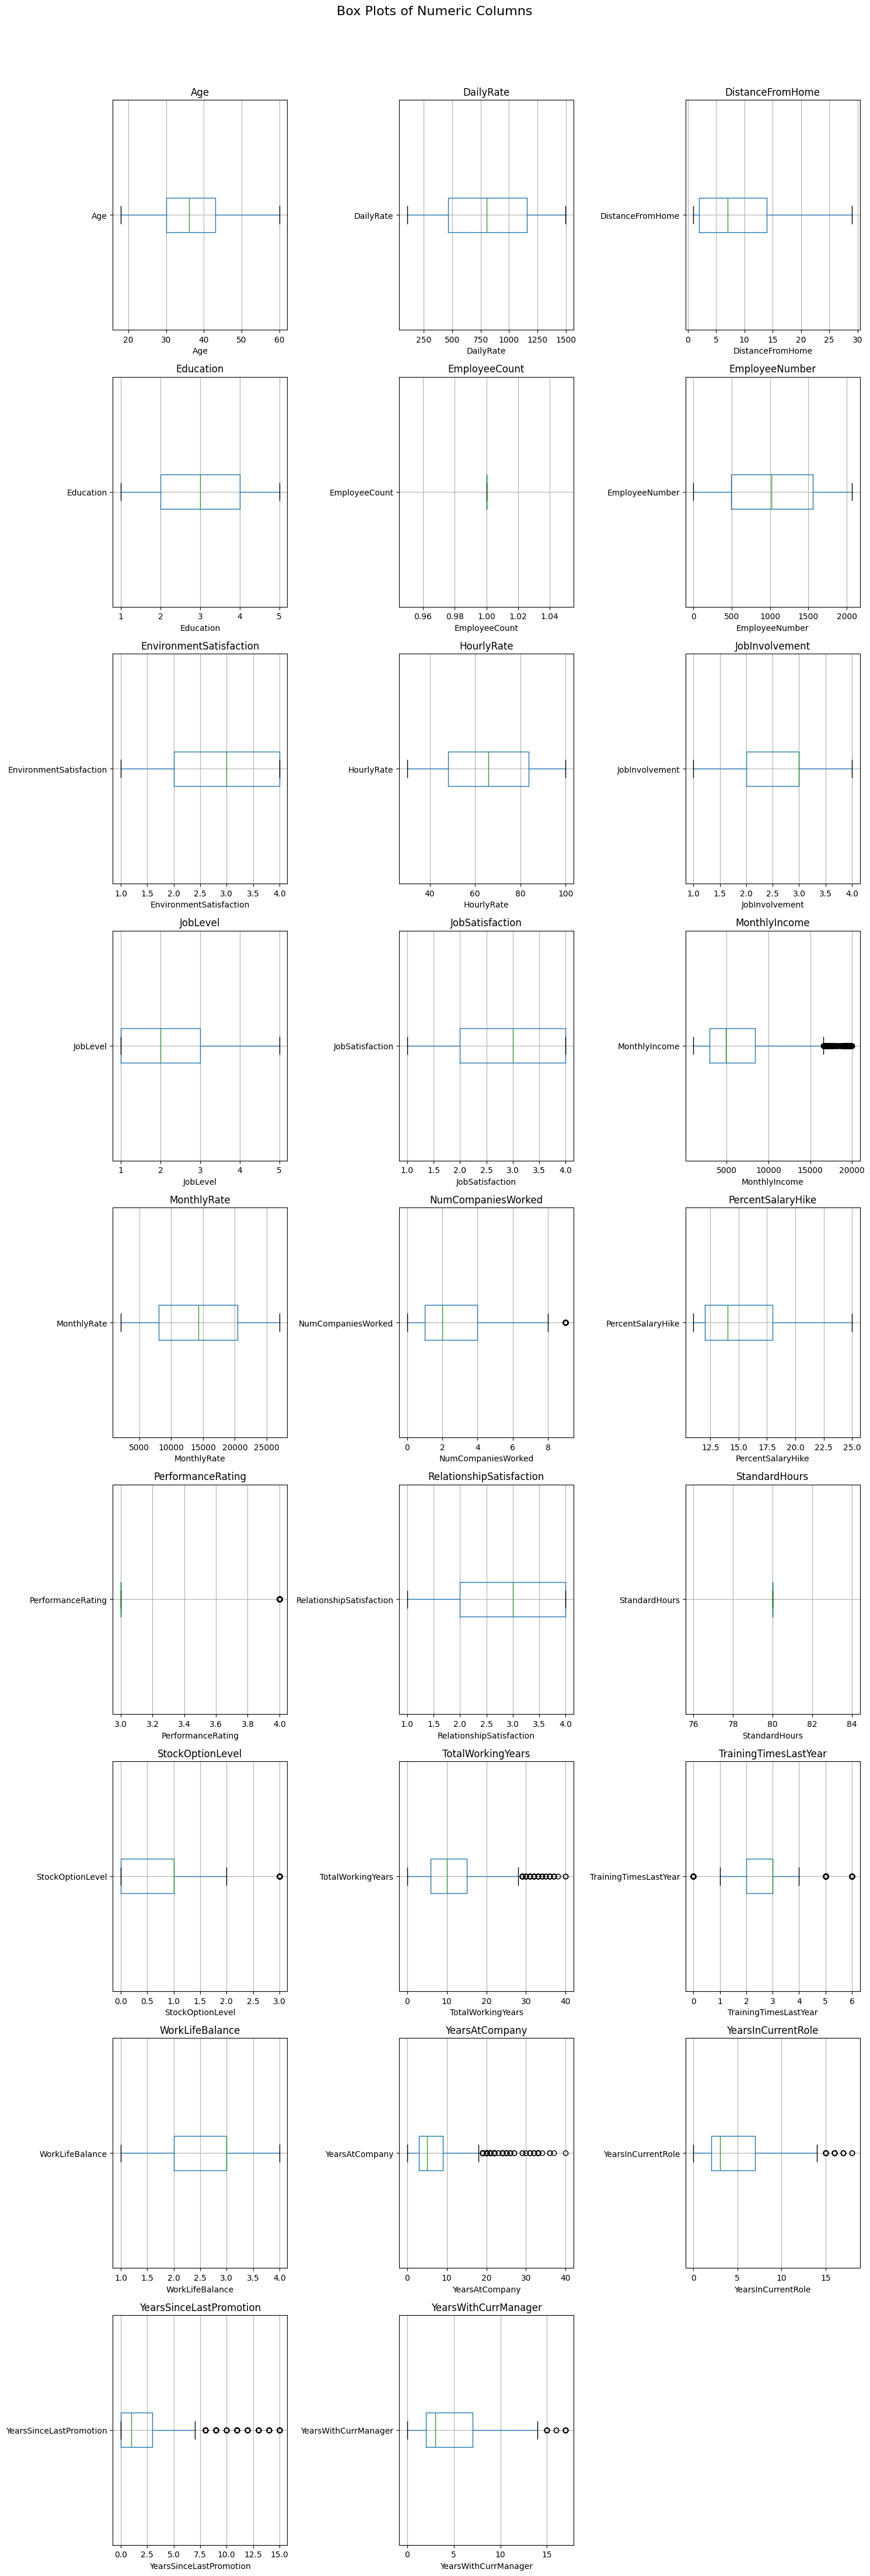

In [10]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)

num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle("Box Plots of Numeric Columns", fontsize=16)

axes = axes.flatten()

for ax, col in zip(axes, numeric_columns):
   df.boxplot(column=col, ax=ax, vert=False)
   ax.set_title(f'{col}')
   ax.set_xlabel(col)

for i in range(len(numeric_columns), len(axes)):
   fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [12]:
def remove_outliers_iqr(df):
   outlier_indices = set()
   for col in df.select_dtypes(include=[np.number]):
       Q1 = df[col].quantile(0.25)
       Q3 = df[col].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR

       outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
       outlier_indices.update(outliers)

   return df.drop(index=outlier_indices), len(outlier_indices)

df_cleaned, total_removed = remove_outliers_iqr(df)

print(f"\nTotal Outliers removed: {total_removed}")
df_cleaned.info()


Total Outliers removed: 691
<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 2 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       779 non-null    int64 
 1   Attrition                 779 non-null    object
 2   BusinessTravel            779 non-null    object
 3   DailyRate                 779 non-null    int64 
 4   Department                779 non-null    object
 5   DistanceFromHome          779 non-null    int64 
 6   Education                 779 non-null    int64 
 7   EducationField            779 non-null    object
 8   EmployeeCount             779 non-null    int64 
 9   EmployeeNumber            779 non-null    int64 
 10  EnvironmentSatisfaction   779 non-null    int64 
 11  Gender                    779 non-null    object
 12  HourlyRate                779 non-null    int64 
 13  JobInvolvement            779 non-null    int64 
 14  J

**Label Encoding of Binary Columns in a DataFrame**

In [13]:
binary_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2]

print("Binary columns in the dataset:")
print(binary_columns)
label_encoder = LabelEncoder()

binary_mappings = {}

for col in binary_columns:
   df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

   mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
   binary_mappings[col] = mapping

print("\nMappings for binary columns:")
for col, mapping in binary_mappings.items():
   print(f"{col}: {mapping}")
df_cleaned.head(10)

Binary columns in the dataset:
['Attrition', 'Gender', 'OverTime']

Mappings for binary columns:
Attrition: {'No': np.int64(0), 'Yes': np.int64(1)}
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
OverTime: {'No': np.int64(0), 'Yes': np.int64(1)}


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
11,29,0,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
12,31,0,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
13,34,0,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
17,22,0,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,2,80,2,1,2,2,1,0,0,0
19,38,0,Travel_Rarely,371,Research & Development,2,3,Life Sciences,1,24,...,3,80,0,6,3,3,3,2,1,2


**Label Encoding of Multi-Class Categorical Columns**

In [14]:
multi_class_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() > 2 and
df_cleaned[col].dtype == 'object']

label_encoder = LabelEncoder()

multi_class_mappings = {}

for col in multi_class_columns:
   df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

   mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
   multi_class_mappings[col] = mapping

print("\nMappings for multi-class columns:")
for col, mapping in multi_class_mappings.items():
   print(f"{col}: {mapping}")
df_cleaned.head(10)


Mappings for multi-class columns:
BusinessTravel: {'Non-Travel': np.int64(0), 'Travel_Frequently': np.int64(1), 'Travel_Rarely': np.int64(2)}
Department: {'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}
EducationField: {'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}
JobRole: {'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Executive': np.int64(7), 'Sales Representative': np.int64(8)}
MaritalStatus: {'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
9,36,0,2,1299,1,27,3,3,1,13,...,2,80,2,17,3,2,7,7,7,7
11,29,0,2,153,1,15,2,1,1,15,...,4,80,0,10,3,3,9,5,0,8
12,31,0,2,670,1,26,1,1,1,16,...,4,80,1,5,1,2,5,2,4,3
13,34,0,2,1346,1,19,2,3,1,18,...,3,80,1,3,2,3,2,2,1,2
14,28,1,2,103,1,24,3,1,1,19,...,2,80,0,6,4,3,4,2,0,3
17,22,0,0,1123,1,16,2,3,1,22,...,2,80,2,1,2,2,1,0,0,0
19,38,0,2,371,1,2,3,1,1,24,...,3,80,0,6,3,3,3,2,1,2


**Min-Max Scaling of Numeric Columns**

In [15]:
df_min_max = df_cleaned.copy()
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
min_max_scaler = MinMaxScaler()
df_min_max[numeric_columns] = min_max_scaler.fit_transform(df_min_max[numeric_columns])
df_min_max.head(10)
df_min_max.to_csv('df_min_max.csv', index=False)
files.download('df_min_max.csv')
df = pd.read_csv('/content/df_min_max.csv')
df.info()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       779 non-null    float64
 1   Attrition                 779 non-null    float64
 2   BusinessTravel            779 non-null    float64
 3   DailyRate                 779 non-null    float64
 4   Department                779 non-null    float64
 5   DistanceFromHome          779 non-null    float64
 6   Education                 779 non-null    float64
 7   EducationField            779 non-null    float64
 8   EmployeeCount             779 non-null    float64
 9   EmployeeNumber            779 non-null    float64
 10  EnvironmentSatisfaction   779 non-null    float64
 11  Gender                    779 non-null    float64
 12  HourlyRate                779 non-null    float64
 13  JobInvolvement            779 non-null    float64
 14  JobLevel  

#**Applying Machine Learning Model**

**Filtering Columns Based on Correlation with Target Variable**

In [16]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Attrition'].abs()

selected_columns = correlation_with_target[correlation_with_target > 0.1].index
print(f'Selected columns with abs(correlation) > 0.5: {selected_columns.tolist()}')

df_filtered = df[selected_columns]

Selected columns with abs(correlation) > 0.5: ['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


**Splitting Data into Training and Testing Sets**

In [19]:
X = df_filtered.drop('Attrition', axis=1)
y = df_filtered['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Evaluation and Comparison of Classifiers**


Evaluating Logistic Regression...

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       131
         1.0       0.80      0.32      0.46        25

    accuracy                           0.88       156
   macro avg       0.84      0.65      0.69       156
weighted avg       0.87      0.88      0.86       156



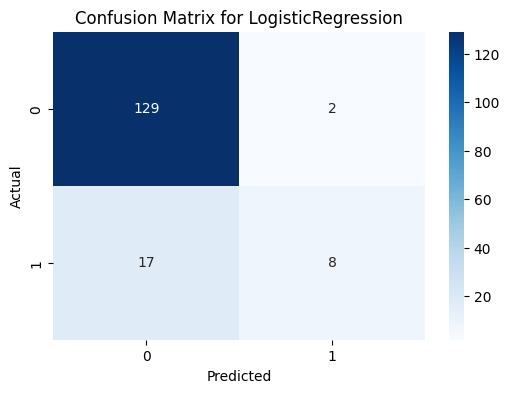


Evaluating Random Forest...

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       131
         1.0       0.78      0.28      0.41        25

    accuracy                           0.87       156
   macro avg       0.83      0.63      0.67       156
weighted avg       0.86      0.87      0.85       156



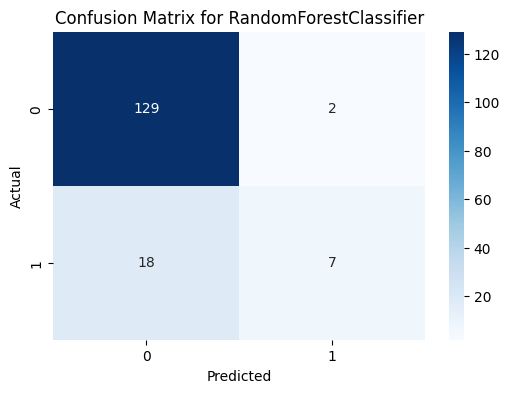


Evaluating SVM...

Classification Report for SVC:

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92       131
         1.0       0.70      0.28      0.40        25

    accuracy                           0.87       156
   macro avg       0.79      0.63      0.66       156
weighted avg       0.85      0.87      0.84       156



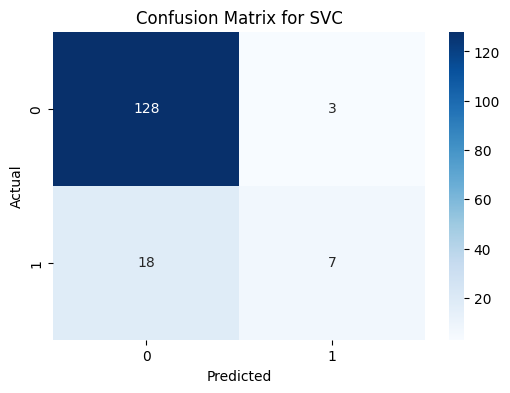


Evaluating Decision Tree...

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       131
         1.0       0.20      0.16      0.18        25

    accuracy                           0.76       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.74      0.76      0.75       156



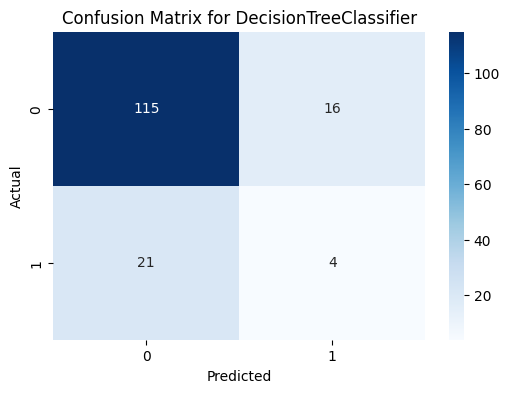


Evaluating K-Nearest Neighbors...

Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       131
         1.0       0.58      0.28      0.38        25

    accuracy                           0.85       156
   macro avg       0.73      0.62      0.65       156
weighted avg       0.83      0.85      0.83       156



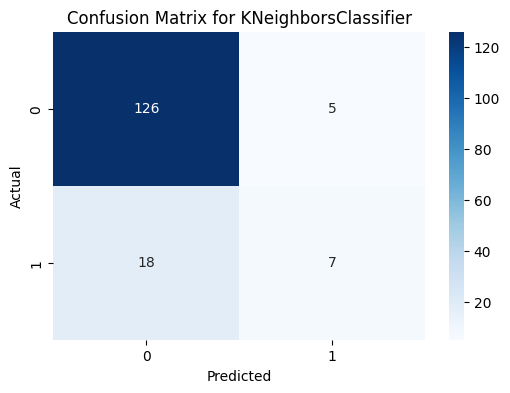

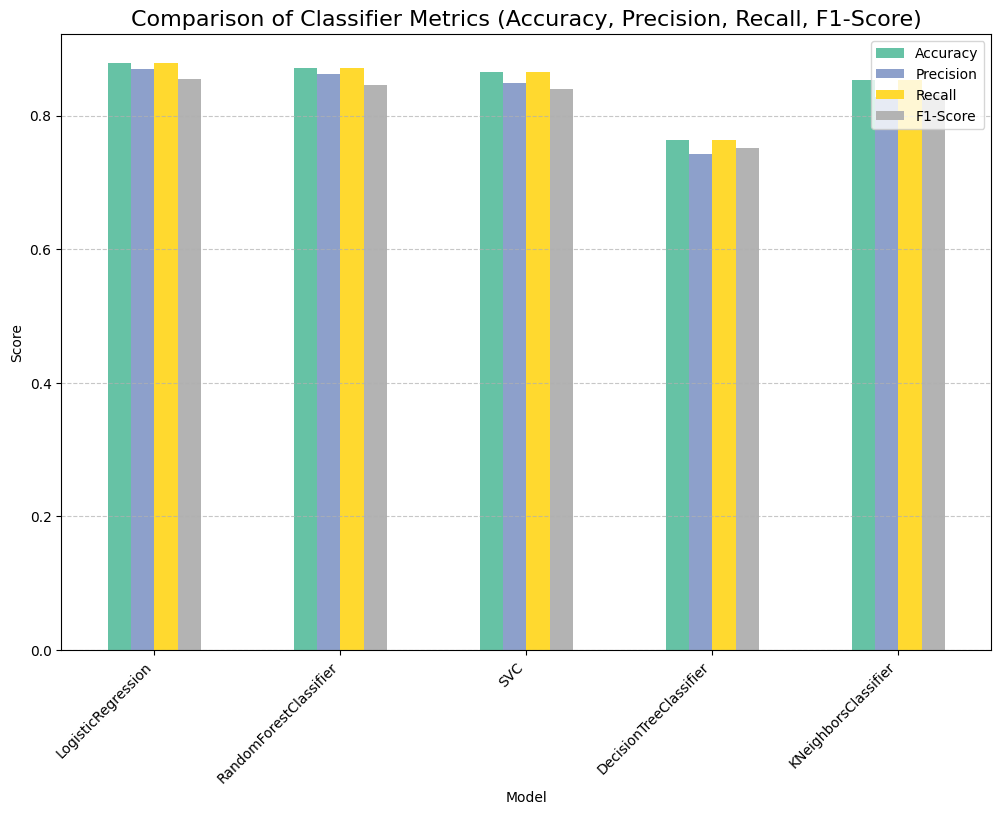

In [24]:
models = {
   "Logistic Regression": LogisticRegression(),
   "Random Forest": RandomForestClassifier(),
   "SVM": SVC(),
   "Decision Tree": DecisionTreeClassifier(),
   "K-Nearest Neighbors": KNeighborsClassifier()
}

metrics = {
   "Model": [],
   "Accuracy": [],
   "Precision": [],
   "Recall": [],
   "F1-Score": []
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)

   report = classification_report(y_test, y_pred, output_dict=True)

   print(f'\nClassification Report for {model.__class__.__name__}:\n')
   print(classification_report(y_test, y_pred))

   metrics["Model"].append(model.__class__.__name__)
   metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
   metrics["Precision"].append(report.get("weighted avg", {}).get("precision", 0))
   metrics["Recall"].append(report.get("weighted avg", {}).get("recall", 0))
   metrics["F1-Score"].append(report.get("weighted avg", {}).get("f1-score", 0))

   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(6, 4))
   sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
   plt.title(f'Confusion Matrix for {model.__class__.__name__}')
   plt.ylabel('Actual')
   plt.xlabel('Predicted')
   plt.show()

for model_name, model in models.items():
   print(f"\nEvaluating {model_name}...")
   evaluate_model(model, X_train, X_test, y_train, y_test)

metrics_df = pd.DataFrame(metrics)

if not metrics_df.empty:
   metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 8), colormap='Set2')
   plt.title('Comparison of Classifier Metrics (Accuracy, Precision, Recall, F1-Score)', fontsize=16)
   plt.ylabel('Score')
   plt.xticks(rotation=45, ha="right")
   plt.grid(True, axis='y', linestyle='--', alpha=0.7)
   plt.show()
else:
   print("No metrics to display.")